# Entrenamiento de modelos con series de Tiempo Parte 2

En este cuaderno Veremos la Implementación de dos modelos: 
- Linear Regression
- Arma Model 
- ExponentialSmoothing 
- VAR para la predicción

Series de tiempo en el modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.api import SVAR
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Creamos el dataframe con todos los datos
data = pd.read_excel('Archivos/DatosCQ.xlsx')
data

Factura Fecha de contabilización                       nombre_cliente  \
0       36674               2020-09-25      DUARTE RODRIGUEZ WILLIAM MOISES   
1       36675               2020-09-25                          INVESAN SAS   
2       36031               2020-06-12                    COASPHARMA S.A.S.   
3       36064               2020-06-18                          COLVET S.A.   
4       36137               2020-07-01          LABORATORIOS VETERLAND LTDA   
...       ...                      ...                                  ...   
9153    40393               2022-07-01              LABORATORIOS ZOO S.A.S.   
9154    41545               2023-03-10               BIOFLUIDOS & FARMA SAS   
9155    41458               2023-02-22                         COLVET S.A.S   
9156    41645               2023-04-03                    COASPHARMA S.A.S.   
9157    41343               2023-02-01  PRODUCTOS MEDICOS VETERINARIOS S.A.   

     Nombre de empleado del departamento de ventas  \
0                  JONATHAN ANDRES HERNANDEZ PRADA   
1                     JENNY MAGALY GONZALEZ FLOREZ   
2                     JENNY MAGALY GONZALEZ FLOREZ   
3                     JENNY MAGALY GONZALEZ FLOREZ   
4                     JENNY MAGALY GONZALEZ FLOREZ   
...                                            ...   
9153                     EVELYN YURANY GOMEZ BARON   
9154              VICTOR ALEJANDRO VACA CASTRILLON   
9155                  JENNY MAGALY GONZALEZ FLOREZ   
9156                  JENNY MAGALY GONZALEZ FLOREZ   
9157                  JENNY MAGALY GONZALEZ FLOREZ   

             Descripción del artículo          Lote         Ciudad  Cantidad  \
0                  CIPROFLOXACINA HCL  105-200424-2         BOGOTA       150   
1                  CIPROFLOXACINA HCL  105-200424-2  FLORIDABLANCA       500   
2     OXITETRACICLINA BASE INYECTABLE   TM191203024         BOGOTA       200   
3     OXITETRACICLINA BASE INYECTABLE   TM191203024         BOGOTA       200   
4     OXITETRACICLINA BASE INYECTABLE   TM191203024         BOGOTA        75   
...                               ...           ...            ...       ...   
9153         HOMATROPINA METILBROMURO      20220301         BOGOTA         1   
9154                      DIOSMECTITA      22331201         BOGOTA       200   
9155      CEFOPERAZONA SODICA ESTERIL    1811402115         BOGOTA        10   
9156  PRAZIQUANTEL MICRONIZADO x 1 KG   BKT211201BM         BOGOTA         1   
9157  ESPIRAMICINA ADIPATO NO ESTERIL     AB170618D         BOGOTA        25   

      Precio Unitario  Impuesto total  ... Número de artículo  \
0              125000             0.0  ...         1007090000   
1              125000             0.0  ...         1007090000   
2              240000             0.0  ...         1007290000   
3              220000             0.0  ...         1007290000   
4              220000             0.0  ...         1007290000   
...               ...             ...  ...                ...   
9153         13500000             0.0  ...         1009020000   
9154            68000             0.0  ...         1038040000   
9155          1100000             0.0  ...         1007060000   
9156           460000             0.0  ...         1015150001   
9157          1300000             0.0  ...         1007200000   

      Atributo de lote 2  Fecha de vencimiento Fecha de fabricación  \
0                  CHINA            2024-04-23           2020-04-24   
1                  CHINA            2024-04-23           2020-04-24   
2                  CHINA            2022-12-23           2019-12-24   
3                  CHINA            2022-12-23           2019-12-24   
4                  CHINA            2022-12-23           2019-12-24   
...                  ...                   ...                  ...   
9153               CHINA            2025-03-09           2022-03-10   
9154               CHINA            2025-12-01           2022-12-02   
9155               CHINA   

In [3]:
#copiamos el dataframe para manejar la regresión lineal
data_linear = data.copy()

In [4]:
data_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Factura                                        9158 non-null   int64         
 1   Fecha de contabilización                       9158 non-null   datetime64[ns]
 2   nombre_cliente                                 9158 non-null   object        
 3   Nombre de empleado del departamento de ventas  9158 non-null   object        
 4   Descripción del artículo                       9158 non-null   object        
 5   Lote                                           9158 non-null   object        
 6   Ciudad                                         9158 non-null   object        
 7   Cantidad                                       9158 non-null   int64         
 8   Precio Unitario                                9158 non-nu

In [5]:
#Creamos el dataframe a utilizar con la fecha de la transacción y valor de la venta de esa transacción
data_ventas_linear=data[['Fecha de contabilización','calculo_total_lineas']]

In [6]:
#Observamos la composición de data_ventas
data_ventas_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha de contabilización  9158 non-null   datetime64[ns]
 1   calculo_total_lineas      9158 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 143.2 KB


In [7]:
#Ordenamos el dataframe por fecha en orden ascendente
data_ventas_linear=data_ventas_linear.sort_values(by='Fecha de contabilización')

In [8]:
#miramos la primera parte del dataframe
data_ventas_linear.head(10)

Fecha de contabilización  calculo_total_lineas
5452               2020-02-03                    10
3311               2020-02-04               5400000
3302               2020-02-04               5400000
1947               2020-02-04              85000000
1946               2020-02-04              85000000
1945               2020-02-04              34000000
7805               2020-02-04              25579680
2215               2020-02-04               1175000
1453               2020-02-04              28200000
1452               2020-02-04               2875000

In [9]:
#miramos la última parte del dataframe
data_ventas_linear.tail(10)

Fecha de contabilización  calculo_total_lineas
8917               2023-08-29               8000000
8588               2023-08-29              11500000
7212               2023-08-29               4750000
8195               2023-08-29                625000
8274               2023-08-29              29250000
8473               2023-08-29               1350000
8314               2023-08-29                600000
8736               2023-08-30               4300000
8822               2023-08-30               3000000
6633               2023-08-31               4250000

In [10]:
#Creamos una copia del dataset original
data_ventas_filtrado=data_ventas_linear.copy()

In [11]:
#Creamos una columna año_mes con el año y el mes de la transacción
data_ventas_filtrado['año_mes'] = data_ventas_filtrado['Fecha de contabilización'].dt.to_period('M')
#Sumamos los valores con el mismo año y mes
df_suma = data_ventas_filtrado.groupby('año_mes')['calculo_total_lineas'].sum().reset_index()


In [12]:
#Plotly no recibe variables de tiempo, por lo que convertimos la columna año mes a string
df_suma['año_mes'] = df_suma['año_mes'].astype(str)

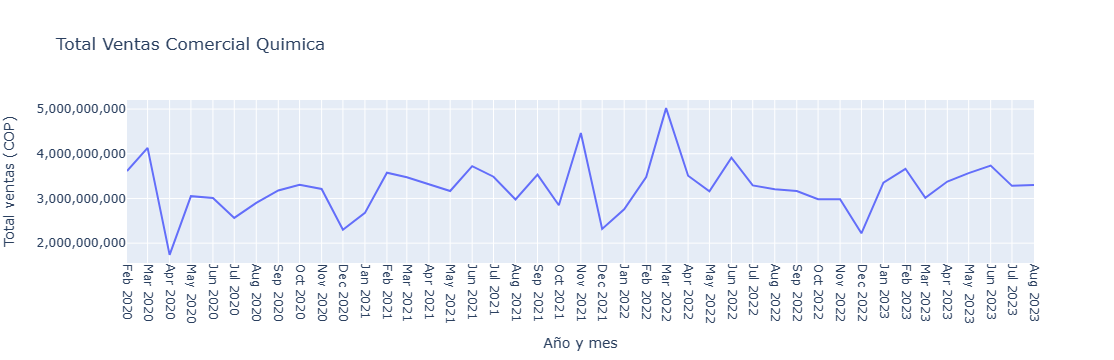

In [13]:
#Graficamos
fig = px.line(df_suma,x='año_mes', y="calculo_total_lineas", title="Total Ventas Comercial Quimica")
fig.update_xaxes(title_text='Año y mes',tickangle=90,nticks=len(df_suma['año_mes']))
fig.update_yaxes(title_text='Total ventas (COP)',exponentformat='none')

fig.show()

### Primer modelo sin ventanas deslizantes

In [14]:
df_suma.head(10)

año_mes  calculo_total_lineas
0  2020-02            3613097397
1  2020-03            4131160800
2  2020-04            1738295600
3  2020-05            3051354025
4  2020-06            3008474469
5  2020-07            2564146104
6  2020-08            2900228584
7  2020-09            3179421000
8  2020-10            3308512874
9  2020-11            3213453775

In [15]:
trainLinear, testLinear = train_test_split(df_suma, test_size=0.2, shuffle=False)
#copiamos test para usarlo más adelante
test_2=testLinear.copy()
#Pasamos a datetime la columna año mes de los datasets train y test
trainLinear['año_mes'] = pd.to_datetime(trainLinear['año_mes'], format='%Y-%m')
testLinear['año_mes'] = pd.to_datetime(testLinear['año_mes'], format='%Y-%m')

In [16]:
#Para poder realizar la regresión lineal necesitamos pasar el tipo fecha al número de mes, es decir mes 0,1,2....
# Extraemos la primera fecha en tus datos
min_date = min(trainLinear['año_mes'])

# Convierte las fechas en número de meses desde la primera fecha
trainLinear['año_mes'] = (trainLinear['año_mes'].dt.year - min_date.year) * 12 + trainLinear['año_mes'].dt.month - min_date.month
testLinear['año_mes'] = (testLinear['año_mes'].dt.year - min_date.year) * 12 + testLinear['año_mes'].dt.month - min_date.month

In [17]:
#Creamos el modelo de regresión lineal
lr = LinearRegression()

# Entrenando el modelo
lr.fit(trainLinear['año_mes'].values.reshape(-1, 1), trainLinear['calculo_total_lineas'])

LinearRegression()

In [18]:
predicciones = lr.predict(testLinear['año_mes'].values.reshape(-1, 1))

In [19]:
mse = mean_squared_error(testLinear['calculo_total_lineas'], predicciones)
print(f'Error Cuadrático Medio: {mse}')
rmse=np.sqrt(mse)
print(f'La raíz del Error Cuadrático Medio: {rmse}')

Error Cuadrático Medio: 2.1629625221722288e+17
La raíz del Error Cuadrático Medio: 465076608.9766533


In [20]:
test_2

año_mes  calculo_total_lineas
34  2022-12            2220360500
35  2023-01            3354667500
36  2023-02            3663962600
37  2023-03            3016006200
38  2023-04            3378752500
39  2023-05            3565805500
40  2023-06            3736117955
41  2023-07            3281917000
42  2023-08            3299826490

In [21]:
df_predicciones=pd.DataFrame({
    'año_mes': test_2['año_mes'],
    'Total líneas': predicciones
})

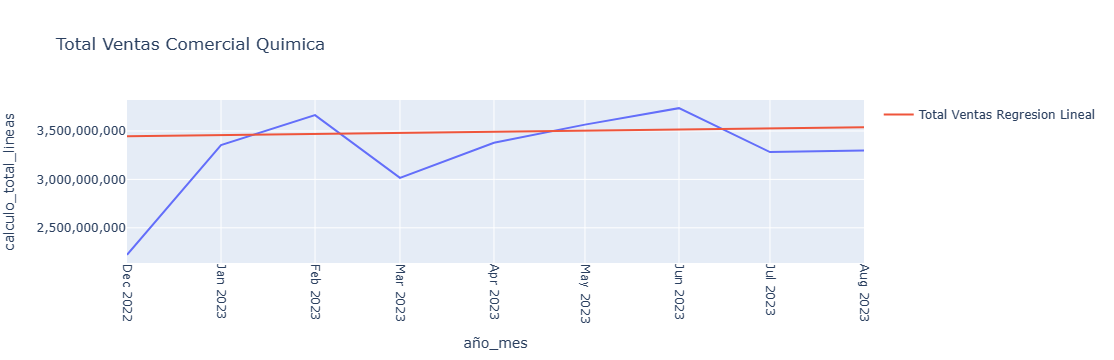

In [22]:
#Graficamos
fig = px.line(test_2,x='año_mes', y="calculo_total_lineas", title="Total Ventas Comercial Quimica")
fig.add_scatter(x=df_predicciones['año_mes'], y=df_predicciones['Total líneas'], mode='lines', name='Total Ventas Regresion Lineal')
fig.update_xaxes(tickangle=90,nticks=len(test_2['año_mes']))
fig.update_yaxes(exponentformat='none')

fig.show()

### Modelado con Ventanas deslizantes

In [23]:
df_ventanas=df_suma.copy()

In [24]:
#Para poder realizar la regresión lineal necesitamos pasar el tipo fecha al número de mes, es decir mes 0,1,2....
#Pasamos a datetime la columna año mes de los datasets train y test
df_ventanas['año_mes'] = pd.to_datetime(df_ventanas['año_mes'], format='%Y-%m')
# Extraemos la primera fecha en tus datos
min_date = min(df_ventanas['año_mes'])

# Convierte las fechas en número de meses desde la primera fecha
df_ventanas['año_mes'] = (df_ventanas['año_mes'].dt.year - min_date.year) * 12 + df_ventanas['año_mes'].dt.month - min_date.month


In [25]:
#Definimos el tamaño de la ventana
tamano_ventana = 2

In [26]:
#Creamos las ventanas deslizantes
X, y = [], []
for i in range(len(df_ventanas) - tamano_ventana):
    ventana = df_ventanas.iloc[i:i+tamano_ventana]
    caracteristicas = ventana['año_mes'].values
    etiqueta = df_ventanas.iloc[i+tamano_ventana]['calculo_total_lineas']
    X.append(caracteristicas)
    y.append(etiqueta)
X = np.array(X)
y = np.array(y)

In [27]:
#Realizamos partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [28]:
#Entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)
#Realizamos las predicciones
predicciones = lr.predict(X_test)

In [29]:
predicciones

array([3.56146059e+09, 3.58357070e+09, 3.60568081e+09, 3.62779092e+09,
       3.64990103e+09, 3.67201114e+09, 3.69412124e+09, 3.71623135e+09,
       3.73834146e+09])

In [30]:
df_predicciones=pd.DataFrame({
    'año_mes': test_2['año_mes'],
    'Total líneas': predicciones
})

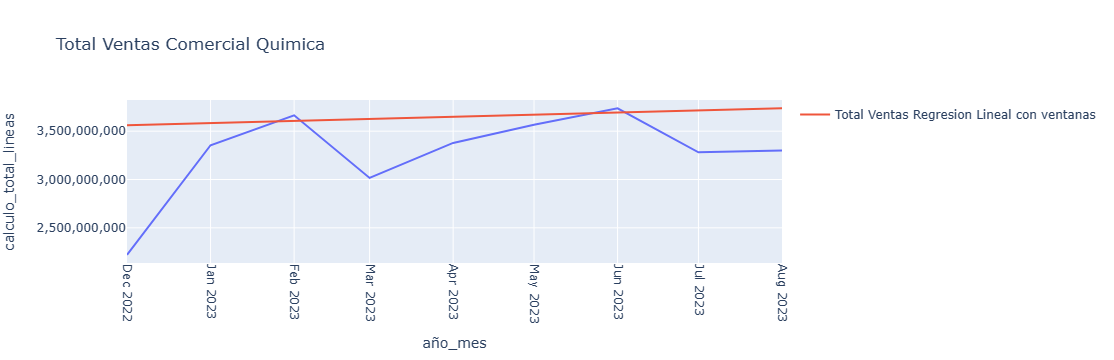

In [31]:
#Graficamos
fig = px.line(test_2,x='año_mes', y="calculo_total_lineas", title="Total Ventas Comercial Quimica")
fig.add_scatter(x=df_predicciones['año_mes'], y=df_predicciones['Total líneas'], mode='lines', name='Total Ventas Regresion Lineal con ventanas')
fig.update_xaxes(tickangle=90,nticks=len(test_2['año_mes']))
fig.update_yaxes(exponentformat='none')

fig.show()

In [32]:
mse = mean_squared_error(test_2['calculo_total_lineas'], predicciones)
print(f'Error Cuadrático Medio: {mse}')
rmse=np.sqrt(mse)
print(f'La raíz del Error Cuadrático Medio: {rmse}')

Error Cuadrático Medio: 2.995680740463283e+17
La raíz del Error Cuadrático Medio: 547328122.8352224


#### Conclusiones:
En este modelo se realizaron dos escenarios diferentes que permitieran establecer una base para los demás modelos. En el primero se realizó una predicción sin usar ventanas deslizantes y en el otro se realizaron predicciones utilizando 2 ventanas deslizantes. El resultado en ambos casos fue el esperado, un error cuadrático medio sumamente alto. Esto se debe primera a la falta de datos suficientes y también que la naturaleza del modelo de regresión lineal no se acomoda a este escenario ya que no incorpora el tiempo como variable de manera intrínseca y no es capaz de captar las relaciones dinámicas que existen con el cambio de tiempo ya que asume una relación lineal constante entre las variables independientes y la variable dependiente.

## Analisis de Variciones de la muestra mes a mes y otros modelos mas avanzados

## Modelo ARMA

En este cuaderno veremos la implementación del modelo

ARMA

Un modelo ARMA combina los componentes AR y MA para modelar una serie temporal. En un modelo ARMA(p, q), se utilizan ambos componentes para capturar las relaciones entre los valores pasados, los términos de error pasados y el valor actual.

Matemáticamente, un modelo ARMA(p, q) se expresa como:

Y(t) = c + φ₁ * Y(t-1) + φ₂ * Y(t-2) + ... + φₚ * Y(t-p) + ε(t) + θ₁ * ε(t-1) + θ₂ * ε(t-2) + ... + θᵠ * ε(t-q)

donde Y(t) es el valor en el tiempo "t", φ₁, φ₂, ..., φₚ son los coeficientes de autorregresión, θ₁, θ₂, ..., θᵠ son los coeficientes de media móvil, "c" es una constante, y ε(t) es el término de error aleatorio.

En resumen, un modelo ARMA se utiliza para modelar y predecir datos de series temporales considerando tanto las relaciones autorregresivas como las de media móvil. La elección de los valores de "p" y "q" se basa en el análisis de datos y en técnicas de selección de modelos. Estos modelos son ampliamente utilizados en finanzas, economía, climatología y otros campos donde se necesita modelar y predecir datos temporales.

In [33]:
nuevo_df = data.loc[:, ["Fecha de contabilización", "calculo_total_lineas"]]

In [34]:
nuevo_df.shape

(9158, 2)

In [35]:
nuevo_df.head(6)

Fecha de contabilización  calculo_total_lineas
0               2020-09-25              18750000
1               2020-09-25              62500000
2               2020-06-12              48000000
3               2020-06-18              44000000
4               2020-07-01              16500000
5               2020-07-01              11500000

Para cumplir con estacionareidad se agrupan los datos de total_lineas por Mes, y cada numero de Mes tendra el valor total de la suma de la columba total_lineas correspondiente para ese Mes y ese año.

In [36]:
# Supongamos que tienes un DataFrame llamado 'nuevo_df' con las columnas 'Fecha de contabilización' y 'calculo_total_lineas'

# Convierte la columna 'Fecha de contabilización' al formato de fecha
nuevo_df['Fecha de contabilización'] = pd.to_datetime(nuevo_df['Fecha de contabilización'])

# Extrae el año y el mes de la fecha
nuevo_df['Año'] = nuevo_df['Fecha de contabilización'].dt.year
nuevo_df['Mes'] = nuevo_df['Fecha de contabilización'].dt.month

# Agrupa los datos por año y mes y suma los valores de 'calculo_total_lineas'
resultados_Arma = nuevo_df.groupby(['Año', 'Mes'], as_index=False)['calculo_total_lineas'].sum()

# Para tener una representación más legible, puedes crear una nueva columna que combine el año y el mes
resultados_Arma['Año-Mes'] = resultados_Arma.apply(lambda row: f"{int(row['Año'])}-{int(row['Mes'])}", axis=1)

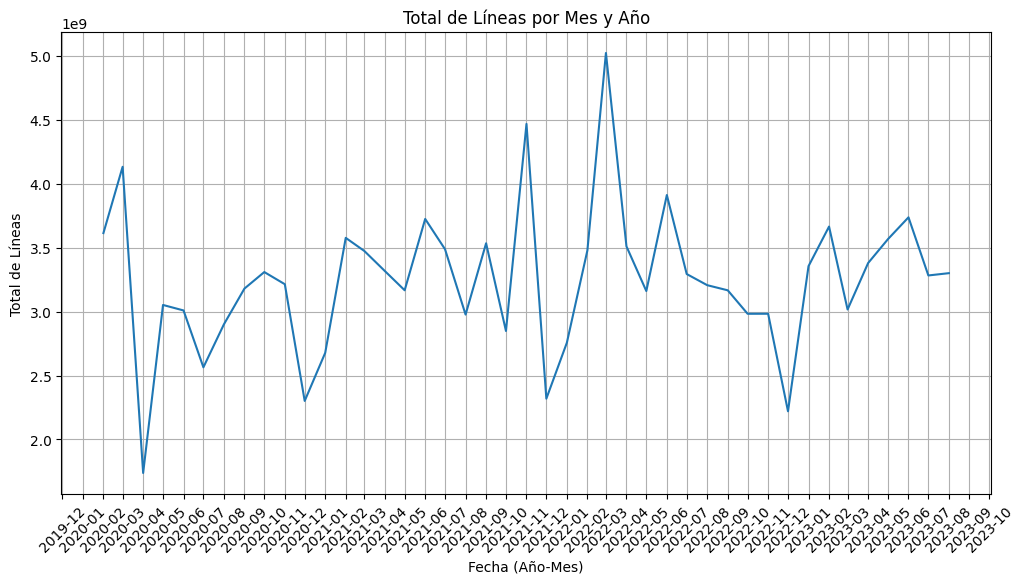

In [37]:
# Supongamos que tienes un DataFrame llamado 'resultados' con las columnas 'Año-Mes' y 'calculo_total_lineas'

# Convierte la columna 'Año-Mes' al formato de fecha para ordenar cronológicamente
resultados_Arma['Año-Mes'] = pd.to_datetime(resultados_Arma['Año-Mes'])

# Ordena el DataFrame por la columna 'Año-Mes' para asegurarte de que los datos estén organizados por antigüedad
resultados_Arma = resultados_Arma.sort_values(by='Año-Mes')

# Grafica los datos en orden cronológico con etiquetas mensuales en el eje x
plt.figure(figsize=(12, 6))
plt.plot(resultados_Arma['Año-Mes'], resultados_Arma['calculo_total_lineas'], label='Total de Líneas')
plt.title('Total de Líneas por Mes y Año')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Total de Líneas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x en 45 grados para una mejor legibilidad
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de etiquetas con año y mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Etiquetas para cada mes
plt.grid(True)
plt.show()

Visualización del nuevo dataset donde utilizarremos calculo_total_lineas y Año-Semana.

In [38]:
resultados_Arma.head(6)

Año  Mes  calculo_total_lineas    Año-Mes
0  2020    2            3613097397 2020-02-01
1  2020    3            4131160800 2020-03-01
2  2020    4            1738295600 2020-04-01
3  2020    5            3051354025 2020-05-01
4  2020    6            3008474469 2020-06-01
5  2020    7            2564146104 2020-07-01

In [39]:
# Ordena el DataFrame por la columna 'Año-Semana' para asegurarte de que los datos estén organizados por antigüedad
resultados_Arma = resultados_Arma.sort_values(by='Año-Mes')
#particiona datos de test
trainArma, testArma = train_test_split(resultados_Arma, test_size=0.2, shuffle=False)

Validación de estacionareidad de los dataset particionados, de entrenamiento y el dataset de validación, como se evidencia en la grafica los valores estan cronologicamente ordenados.

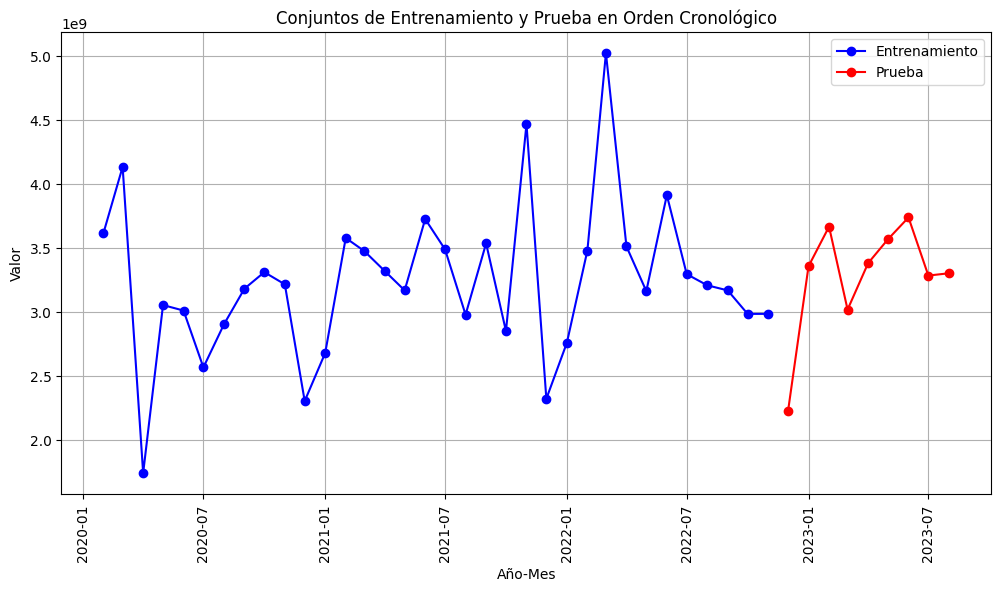

In [40]:
# Ordena los conjuntos de datos de entrenamiento y prueba por 'Año-Mes'
trainArma = trainArma.sort_values(by='Año-Mes')
testArma = testArma.sort_values(by='Año-Mes')

# Grafica los datos de entrenamiento en azul y los datos de prueba en rojo
plt.figure(figsize=(12, 6))
plt.plot(trainArma['Año-Mes'], trainArma['calculo_total_lineas'], label='Entrenamiento', marker='o', color='blue')
plt.plot(testArma['Año-Mes'], testArma['calculo_total_lineas'], label='Prueba', marker='o', color='red')
plt.xlabel('Año-Mes')
plt.ylabel('Valor')
plt.title('Conjuntos de Entrenamiento y Prueba en Orden Cronológico')
plt.legend()

# Rotar los labels del eje x en 90 grados
plt.xticks(rotation=90)

plt.grid(True)
plt.show()

In [41]:
trainArma.head(10)

Año  Mes  calculo_total_lineas    Año-Mes
0  2020    2            3613097397 2020-02-01
1  2020    3            4131160800 2020-03-01
2  2020    4            1738295600 2020-04-01
3  2020    5            3051354025 2020-05-01
4  2020    6            3008474469 2020-06-01
5  2020    7            2564146104 2020-07-01
6  2020    8            2900228584 2020-08-01
7  2020    9            3179421000 2020-09-01
8  2020   10            3308512874 2020-10-01
9  2020   11            3213453775 2020-11-01

In [42]:
testArma.head(10)

Año  Mes  calculo_total_lineas    Año-Mes
34  2022   12            2220360500 2022-12-01
35  2023    1            3354667500 2023-01-01
36  2023    2            3663962600 2023-02-01
37  2023    3            3016006200 2023-03-01
38  2023    4            3378752500 2023-04-01
39  2023    5            3565805500 2023-05-01
40  2023    6            3736117955 2023-06-01
41  2023    7            3281917000 2023-07-01
42  2023    8            3299826490 2023-08-01

In [43]:
trainArma["calculo_total_lineas"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3.400000e+01
mean     3.236378e+09
std      6.110454e+08
min      1.738296e+09
5%       2.312869e+09
25%      2.977737e+09
50%      3.192671e+09
75%      3.503670e+09
95%      4.248472e+09
max      5.020434e+09
Name: calculo_total_lineas, dtype: float64

In [44]:
# Let's make some calculations for determining an outlier threshold
q1 = trainArma["calculo_total_lineas"].quantile(0.25)
q3 = trainArma["calculo_total_lineas"].quantile(0.75)
iqr = q3 - q1

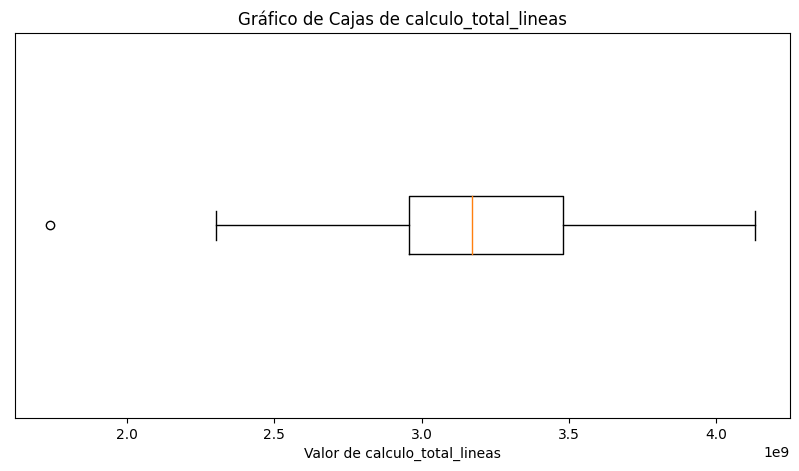

In [45]:
# Box plot for CANTIDAD
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = trainArma.loc[trainArma["calculo_total_lineas"] <= (q3 + 1.5 * iqr)]["calculo_total_lineas"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de calculo_total_lineas")
plt.xlabel("Valor de calculo_total_lineas")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

In [46]:
testArma["calculo_total_lineas"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    9.000000e+00
mean     3.279713e+09
std      4.535151e+08
min      2.220360e+09
5%       2.538619e+09
25%      3.281917e+09
50%      3.354668e+09
75%      3.565806e+09
95%      3.707256e+09
max      3.736118e+09
Name: calculo_total_lineas, dtype: float64

In [47]:
# Let's make some calculations for determining an outlier threshold
q1 = testArma["calculo_total_lineas"].quantile(0.25)
q3 = testArma["calculo_total_lineas"].quantile(0.75)
iqr = q3 - q1

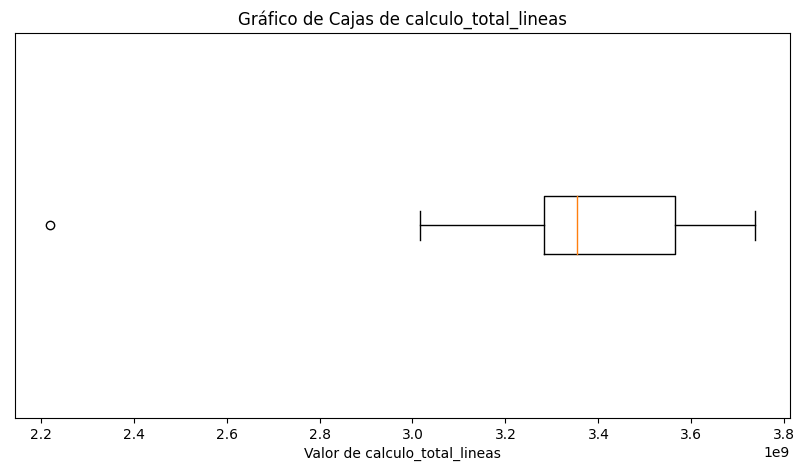

In [48]:
# Box plot for CANTIDAD
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = testArma.loc[testArma["calculo_total_lineas"] <= (q3 + 1.5 * iqr)]["calculo_total_lineas"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de calculo_total_lineas")
plt.xlabel("Valor de calculo_total_lineas")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

La media y la variación estandar estan cercanas sin embargo tienen una diferencia considerable entre los 2 conjutnos definidos para el entrenamiento y las pruebas
A continuación se mostrara el modelo ARMA y los resultados bajo un aprueba de 5 distintos valores para los parametros p y q, (50, 50), (15, 15), (5, 5), (3, 2), (1, 1), sobre la grafica podemos ver el ajuste para cada valor, adicional a los datos de MSE, RMSE e IAC.

({50}, {50})
MSE: 7.085086529102947e+17
RMSE: 841729560.4351166
AIC: 1648.3435571212553


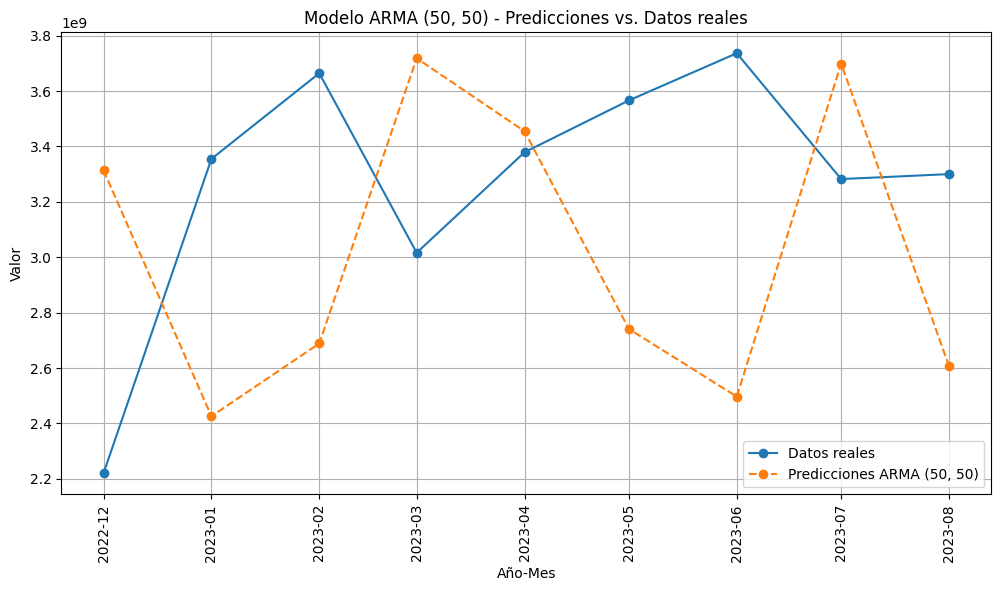

({15}, {15})
MSE: 7.259943440362501e+17
RMSE: 852053017.151075
AIC: 1518.9572237058778


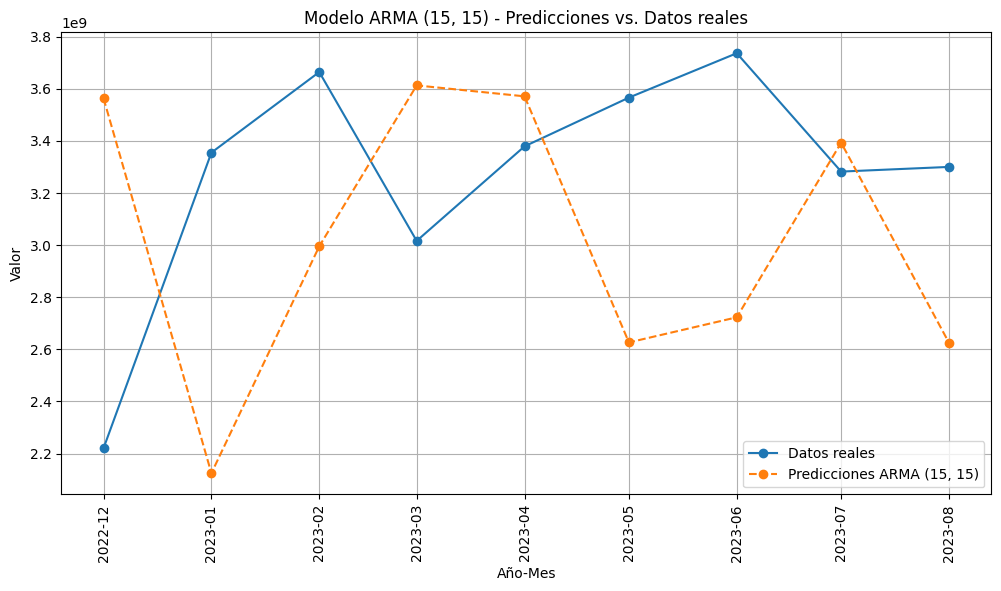

({5}, {5})
MSE: 2.8569348262697238e+17
RMSE: 534503023.9642919
AIC: 1489.1529961350745


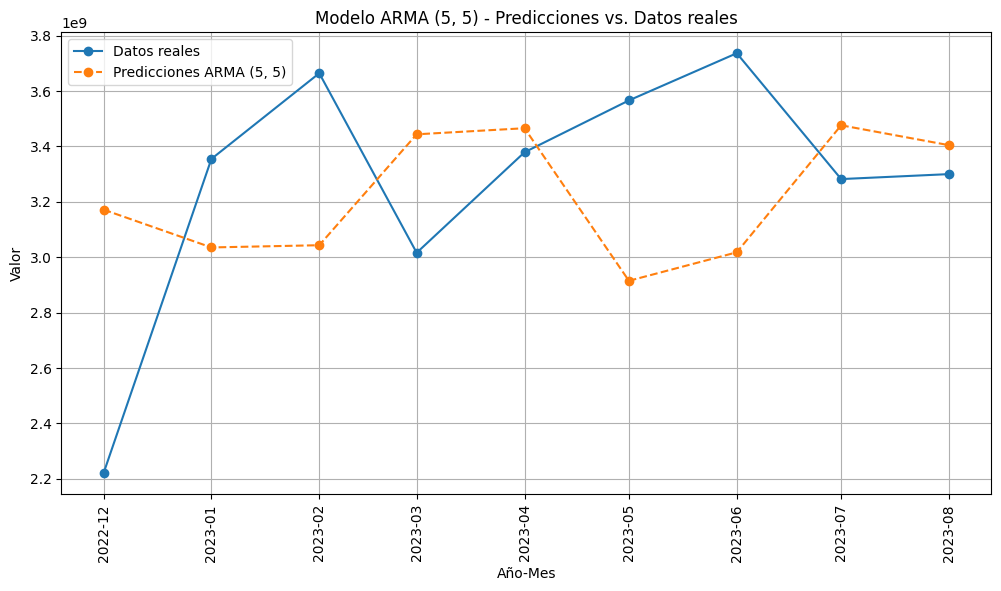

({3}, {2})
MSE: 3.2078550760360794e+17
RMSE: 566379296.5880797
AIC: 1480.5363686018934


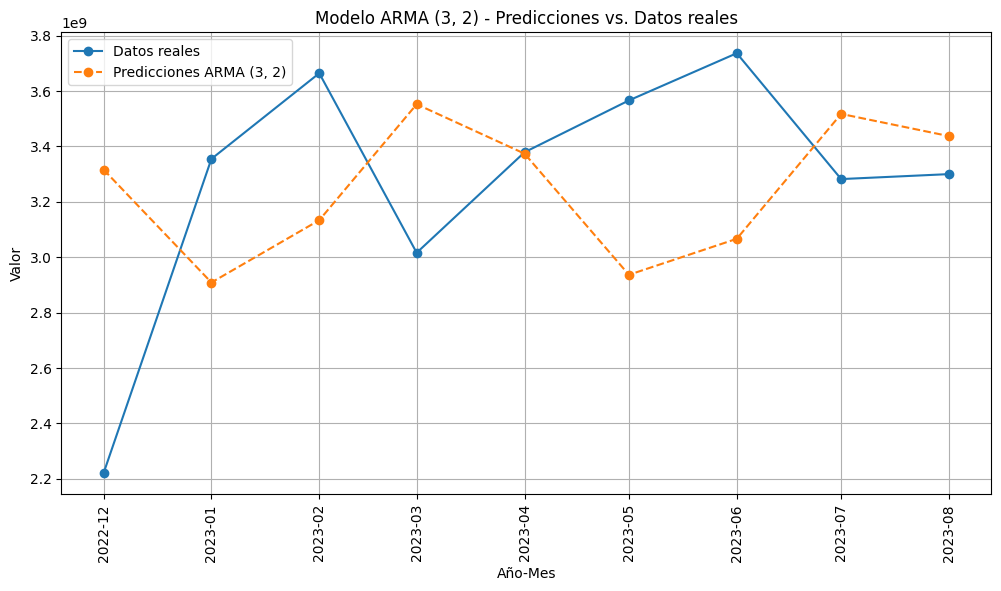

({1}, {1})
MSE: 1.887867742971892e+17
RMSE: 434496000.32358086
AIC: 1479.607367838991


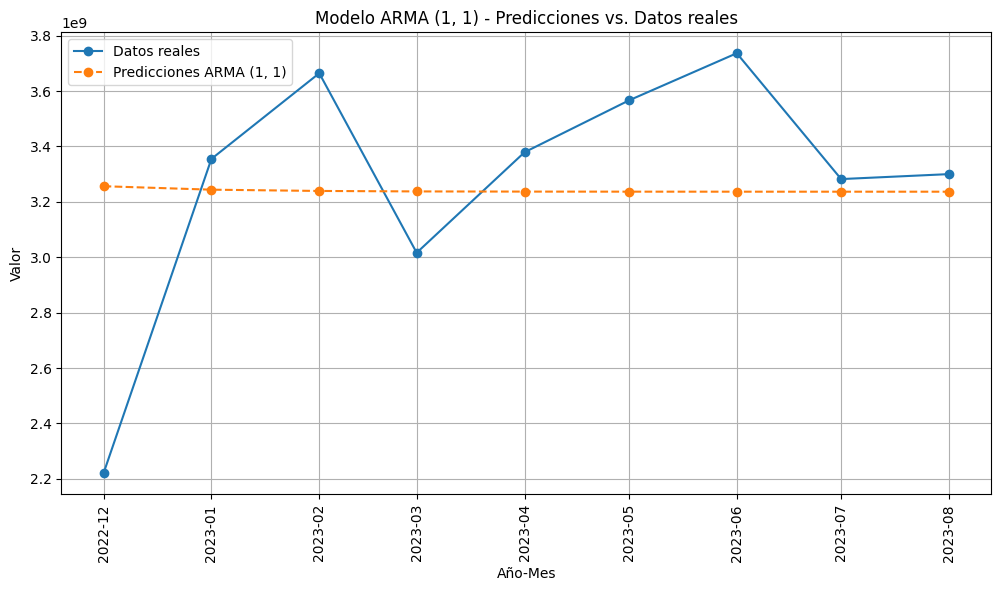

In [49]:
# Asegúrate de que los datos estén ordenados cronológicamente
trainArma = trainArma.sort_values(by='Año-Mes')
testArma = testArma.sort_values(by='Año-Mes')

# Define una lista de combinaciones de parámetros para ARMA (p, q)
param_combinations_arma = [(50, 50), (15, 15), (5, 5), (3, 2), (1, 1)]  # Puedes ajustar estos valores según tus necesidades

# Itera a través de las combinaciones de parámetros y genera gráficos independientes
for p, q in param_combinations_arma:
    # Ajusta un modelo ARIMA con d=0 para simular un modelo ARMA
    model = sm.tsa.ARIMA(trainArma['calculo_total_lineas'], order=(p, 0, q))
    model_fit = model.fit()

    # Realiza predicciones en el conjunto de prueba
    predictions = model_fit.predict(start=len(trainArma), end=len(trainArma) + len(testArma) - 1)

    # Calcula el MSE y RMSE
    mse = mean_squared_error(testArma['calculo_total_lineas'], predictions)
    rmse = np.sqrt(mse)

    # Calcula el AIC
    aic = model_fit.aic

    # Imprime las
    print(({p}, {q}))
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'AIC: {aic}')

    # Grafica las predicciones y los datos reales en orden cronológico
    plt.figure(figsize=(12, 6))
    plt.plot(testArma['Año-Mes'], testArma['calculo_total_lineas'], label='Datos reales', marker='o')
    plt.plot(testArma['Año-Mes'], predictions, label=f'Predicciones ARMA ({p}, {q})', linestyle='--', marker='o')
    plt.legend()
    plt.title(f'Modelo ARMA ({p}, {q}) - Predicciones vs. Datos reales')
    plt.xlabel('Año-Mes')
    plt.ylabel('Valor')

    # Rotar los labels del eje x en 90 grados
    plt.xticks(rotation=90)

    plt.grid(True)
    plt.show()


* Selección del Modelo:
    El modelo ARMA con (p=1, q=1) es el que mejor se ajusta a los datos y produce las predicciones más precisas en comparación con los otros modelos evaluados. Tiene los valores más bajos de MSE, RMSE y AIC, lo que sugiere un ajuste sólido y predicciones precisas.

* Importancia de la Selección de Parámetros:
    La elección de los valores de p y q en un modelo ARMA es crucial. Los modelos con valores altos de p y q (como p=50, q=50) pueden resultar en peores predicciones y un ajuste deficiente. Es importante buscar un equilibrio entre la complejidad del modelo y su capacidad para capturar la dinámica de los datos.

* Comparación de Modelos:
    La comparación de diferentes modelos ARMA es esencial. Las métricas como MSE, RMSE y AIC son herramientas útiles para evaluar y seleccionar el mejor modelo en función de tus objetivos y necesidades específicos.

* Precisión en las Predicciones:
    Los valores bajos de MSE y RMSE indican que el modelo ARMA con (p=1, q=1) tiene predicciones más precisas y está más cerca de los valores reales en promedio.

* AIC y Complejidad del Modelo:
    El AIC refleja el equilibrio entre la calidad del ajuste y la complejidad del modelo. Un valor más bajo de AIC sugiere un mejor equilibrio y preferencia por un modelo.

En resumen, la elección de un modelo ARMA adecuado es esencial para el análisis de series temporales. El modelo con (p=1, q=1) es el preferido en función de las métricas proporcionadas, pero es importante considerar el contexto, los objetivos y la interpretación de los resultados al seleccionar un modelo para aplicaciones prácticas. por ello el modelo que mas se ajusta a la temporalidad de los datos es el que mantiene los valores de p y q mas altos, aunque estadisticamente estos modelos tienen un error mas grande, sin embargo, revisando el negocio es el mas ajustable, p =3 y q = 2.

({3}, {2})
MSE: 3.2078550760360794e+17
RMSE: 566379296.5880797
AIC: 1480.5363686018934


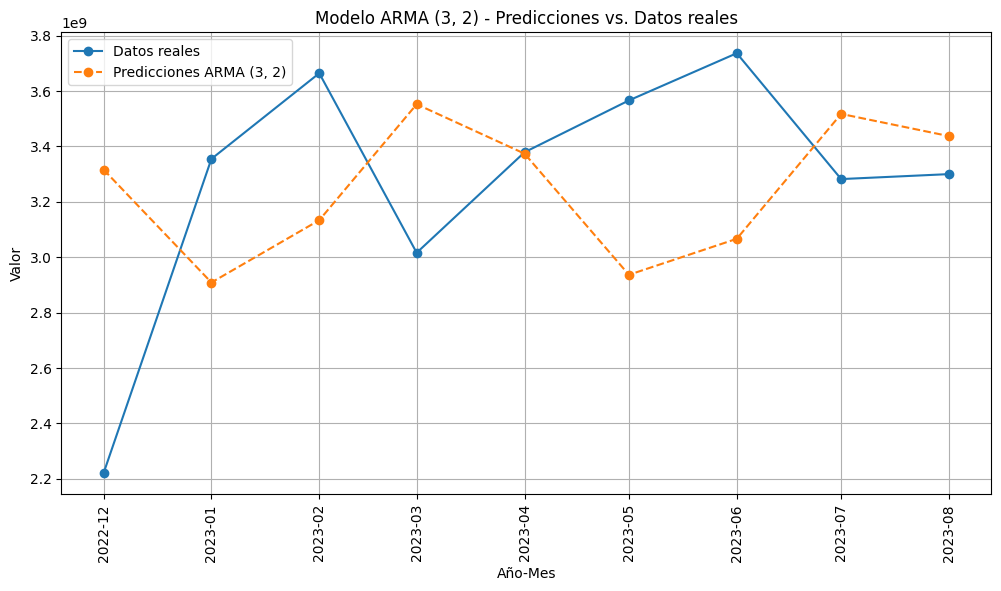

In [50]:
trainArma = trainArma.sort_values(by='Año-Mes')
testArma = testArma.sort_values(by='Año-Mes')

# Define una lista de combinaciones de parámetros para ARMA (p, q)
param_combinations_arma = [(3, 2)]  # Puedes ajustar estos valores según tus necesidades

# Itera a través de las combinaciones de parámetros y genera gráficos independientes
for p, q in param_combinations_arma:
    # Ajusta un modelo ARIMA con d=0 para simular un modelo ARMA
    model = sm.tsa.ARIMA(trainArma['calculo_total_lineas'], order=(p, 0, q))
    model_fit = model.fit()

    # Realiza predicciones en el conjunto de prueba
    predictions = model_fit.predict(start=len(trainArma), end=len(trainArma) + len(testArma) - 1)

    # Calcula el MSE y RMSE
    mse = mean_squared_error(testArma['calculo_total_lineas'], predictions)
    rmse = np.sqrt(mse)

    # Calcula el AIC
    aic = model_fit.aic

    # Imprime las
    print(({p}, {q}))
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'AIC: {aic}')

    # Grafica las predicciones y los datos reales en orden cronológico
    plt.figure(figsize=(12, 6))
    plt.plot(testArma['Año-Mes'], testArma['calculo_total_lineas'], label='Datos reales', marker='o')
    plt.plot(testArma['Año-Mes'], predictions, label=f'Predicciones ARMA ({p}, {q})', linestyle='--', marker='o')
    plt.legend()
    plt.title(f'Modelo ARMA ({p}, {q}) - Predicciones vs. Datos reales')
    plt.xlabel('Año-Mes')
    plt.ylabel('Valor')

    # Rotar los labels del eje x en 90 grados
    plt.xticks(rotation=90)

    plt.grid(True)
    plt.show()

Validación de supuesto con el mejor modelo ARMA p=3 y q=2

In [51]:
# Realiza la prueba de Dickey-Fuller aumentada (ADF) en los residuos del modelo ARMA
result = adfuller(model_fit.resid)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -5.50693445526492
p-value: 2.012030839941361e-06
Critical Values: {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}


El valor de la estadística ADF es -5.506941457770968. Esta estadística es fundamental para la prueba ADF y se utiliza para evaluar si los residuos son estacionarios. En este caso, el valor es menor que los valores críticos de los percentiles 1%, 5% y 10%, lo que sugiere que los residuos son estacionarios. Un valor más negativo indica una mayor probabilidad de estacionariedad.

El valor p es 2.0119617322376923e-06, que es extremadamente pequeño. Un valor p pequeño sugiere que podemos rechazar la hipótesis nula de no estacionariedad en favor de la hipótesis alternativa de estacionariedad. En otras palabras, los residuos se consideran estacionarios.

En resumen, la prueba ADF en los residuos del modelo ARMA indica que los residuos son estacionarios. Esto es una señal positiva, ya que la estacionariedad de los residuos es un supuesto fundamental para muchos modelos de series temporales, incluido ARMA. La estacionariedad sugiere que los patrones en los datos han sido capturados adecuadamente y que el modelo es adecuado para su uso en predicciones futuras. Sin embargo, es importante considerar otros aspectos del modelo, como la precisión de las predicciones en el conjunto de prueba

Text(0.5, 1.0, 'Función de Autocorrelación Parcial de Residuos')

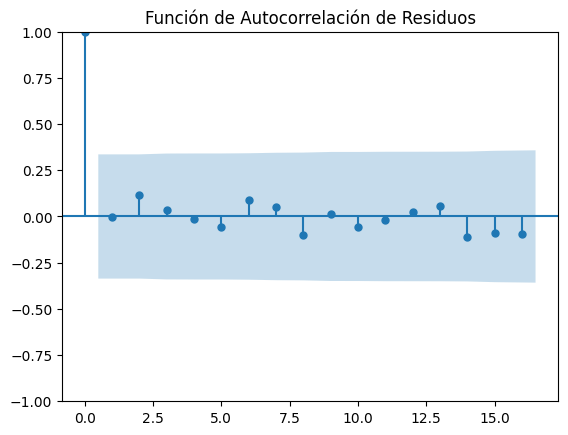

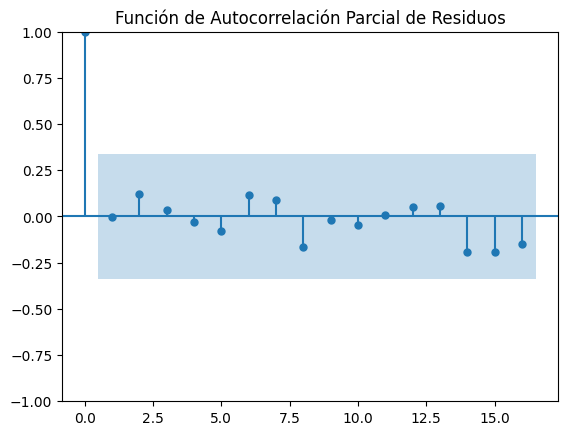

In [52]:
# Visualiza la función de autocorrelación de los residuos
plot_acf(model_fit.resid)
plt.title('Función de Autocorrelación de Residuos')

# Visualiza la función de autocorrelación parcial de los residuos
plot_pacf(model_fit.resid)
plt.title('Función de Autocorrelación Parcial de Residuos')

La función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) de los residuos son herramientas comunes utilizadas en el análisis de series de tiempo para evaluar la presencia de autocorrelación en los residuos de un modelo.

En la gráfica de la función de autocorrelación (ACF), se muestra cómo las observaciones en un período dado se correlacionan con las observaciones en períodos anteriores a medida que aumenta el rezago. En este caso, si los valores de la ACF varían entre 0.25 y -0.25, esto sugiere que hay una correlación débil entre los residuos en períodos anteriores. Si todos los valores fueran cercanos a cero, indicaría que los residuos son esencialmente ruido blanco y no hay autocorrelación significativa.

En la gráfica de la función de autocorrelación parcial (PACF), se muestra la correlación entre las observaciones en un período dado y las observaciones en los períodos anteriores, eliminando el efecto de los períodos intermedios. Si los valores de la PACF varían entre 0.25 y -0.25, sugiere que, incluso después de eliminar la correlación en los períodos intermedios, todavía existe una correlación débil entre los residuos en períodos anteriores. Nuevamente, si todos los valores fueran cercanos a cero, indicaría que los residuos son ruido blanco.

En general, los valores de la ACF y PACF cercanos a cero sugieren que los residuos son esencialmente ruido blanco, lo que es una buena señal. Esto indica que el modelo ARMA ha capturado la mayoría de la autocorrelación en los datos y que los residuos no muestran patrones significativos de autocorrelación. Esto es deseable en el análisis de series de tiempo, ya que los residuos deben ser ruido blanco para que el modelo sea válido.

In [53]:
# Realiza la prueba de normalidad de Shapiro-Wilk en los residuos
stat, p = shapiro(model_fit.resid)
print('Estadística de prueba:', stat)
print('p-valor:', p)

Estadística de prueba: 0.9849280118942261
p-valor: 0.9094924330711365


La estadística de prueba (stat) se acerca a 1, lo que sugiere que los residuos tienen una distribución que se asemeja a una distribución normal. Cuanto más cercano esté el valor de la estadística a 1, mayor será la similitud con una distribución normal.

El p-valor (p) es 0.9094587564468384, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de normalidad. En otras palabras, los residuos no se desvían significativamente de una distribución normal.

Conclusión:

En conclusión, basándonos en los resultados de la prueba de normalidad de Shapiro-Wilk, no hay evidencia que sugiera que los residuos del modelo ARMA no siguen una distribución normal. Esto es una señal positiva en el análisis de los residuos, ya que indica que los residuos se comportan de manera similar a una distribución normal, lo que es un supuesto importante para muchos métodos estadísticos.

En resumen, aunque el modelo ARMA es una opción válida para el análisis de series temporales, los resultados sugieren que puede haber un ajuste más adecuado utilizando modelos diferentes, como se mencionó anteriormente, es esencial considerar otros enfoques, como modelos ARIMA o VAR (Vector AutoRegressive), u otros métodos de análisis de series temporales. La elección del modelo dependerá en última instancia de la naturaleza de los datos y los objetivos específicos del análisis. Es fundamental realizar una evaluación exhaustiva de diferentes modelos antes de tomar decisiones críticas basadas en los resultados del análisis de series temporales.

# Modelo VAR:

In [54]:
data['mes'] = data['Fecha de contabilización'].dt.month
media_por_mes = data.groupby('mes')['calculo_total_lineas'].mean()
media_por_mes

mes
1     1.740294e+07
2     1.391310e+07
3     1.667500e+07
4     1.502310e+07
5     1.531760e+07
6     1.730282e+07
7     1.429855e+07
8     1.488239e+07
9     1.517463e+07
10    1.419103e+07
11    1.450676e+07
12    1.458596e+07
Name: calculo_total_lineas, dtype: float64

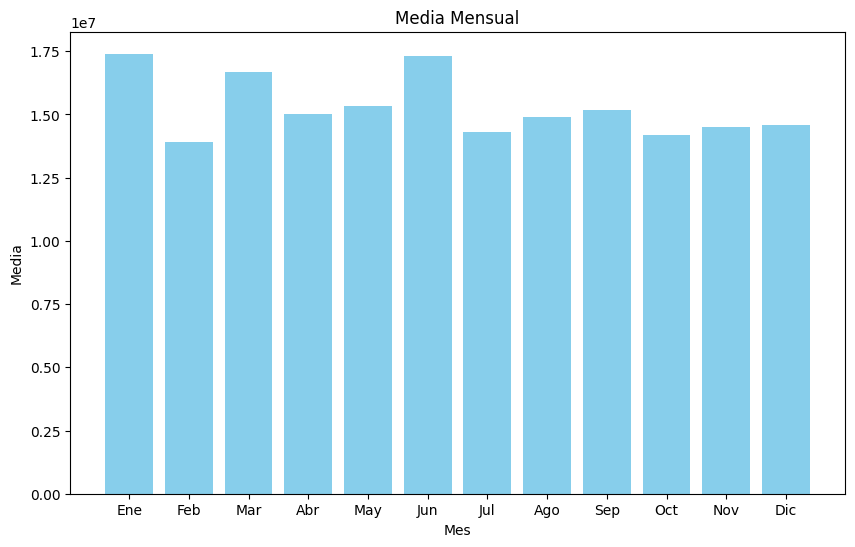

In [55]:
# Crea un gráfico de barras para visualizar la media mensual
#Revisemos 
plt.figure(figsize=(10, 6))
plt.bar(media_por_mes.index, media_por_mes.values, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Media')
plt.title('Media Mensual')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [56]:
data['mes_año'] = data['Fecha de contabilización'].dt.strftime('%Y-%m')

In [57]:
ventas_por_mes_año = data.groupby('mes_año')['calculo_total_lineas'].sum()

In [58]:
ventas_por_mes_año

mes_año
2020-02    3613097397
2020-03    4131160800
2020-04    1738295600
2020-05    3051354025
2020-06    3008474469
2020-07    2564146104
2020-08    2900228584
2020-09    3179421000
2020-10    3308512874
2020-11    3213453775
2020-12    2301421508
2021-01    2677328500
2021-02    3575700929
2021-03    3473547349
2021-04    3316913700
2021-05    3166130094
2021-06    3723566900
2021-07    3486473150
2021-08    2976174880
2021-09    3533424500
2021-10    2848087555
2021-11    4466335450
2021-12    2319033695
2022-01    2756487200
2022-02    3477733300
2022-03    5020434350
2022-04    3509402200
2022-05    3160079165
2022-06    3910485842
2022-07    3293087800
2022-08    3205920725
2022-09    3165840100
2022-10    2982425275
2022-11    2982681000
2022-12    2220360500
2023-01    3354667500
2023-02    3663962600
2023-03    3016006200
2023-04    3378752500
2023-05    3565805500
2023-06    3736117955
2023-07    3281917000
2023-08    3299826490
Name: calculo_total_lineas, dtype: int64

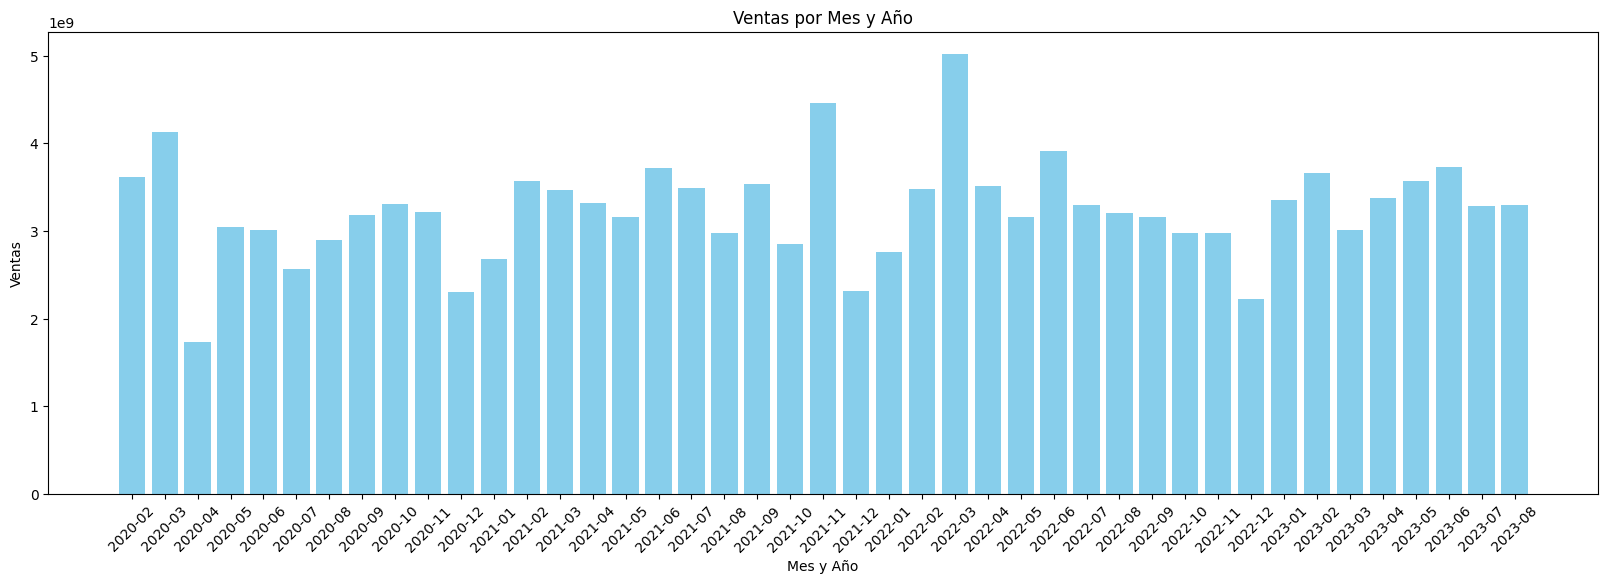

In [59]:
# Suponiendo que 'ventas_por_mes_año' es tu serie con la suma de ventas por mes y año

# Crea un gráfico de barras para visualizar las ventas por mes y año
plt.figure(figsize=(20, 6))
plt.bar(ventas_por_mes_año.index, ventas_por_mes_año.values, color='skyblue')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas')
plt.title('Ventas por Mes y Año')
plt.xticks(rotation=45)
plt.show()

In [60]:
data=data.sort_values(by='Fecha de contabilización')

In [61]:
#Creamos el dataframe a utilizar con la fecha de la transacción y valor de la venta de esa transacción
data_ventas=data[['Fecha de contabilización','calculo_total_lineas']]

In [62]:
data_ventas

Fecha de contabilización  calculo_total_lineas
5452               2020-02-03                    10
3311               2020-02-04               5400000
3302               2020-02-04               5400000
1947               2020-02-04              85000000
1946               2020-02-04              85000000
...                       ...                   ...
8473               2023-08-29               1350000
8314               2023-08-29                600000
8736               2023-08-30               4300000
8822               2023-08-30               3000000
6633               2023-08-31               4250000

[9158 rows x 2 columns]

In [63]:
df_ventas = pd.DataFrame({'mes_año': ventas_por_mes_año.index, 'ventas': ventas_por_mes_año.values})

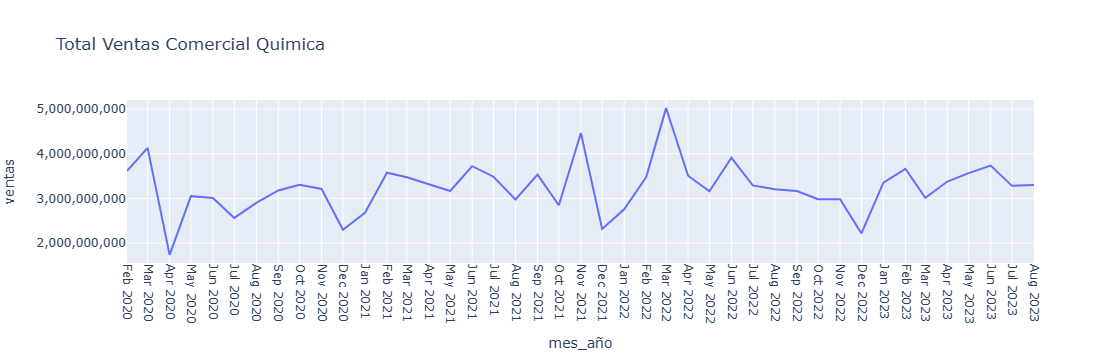

In [64]:
#Graficamos
fig = px.line(df_ventas,x='mes_año', y="ventas", title="Total Ventas Comercial Quimica")
fig.update_xaxes(tickangle=90,nticks=len(df_ventas['mes_año']))
fig.update_yaxes(exponentformat='none')

fig.show()

<h2>Entrenamiento del primer modelo ExponentialSmoothing, esto con los meses acumulados</h2>

In [65]:
#Partimos los datos de entrenamiento y prueba
train, test = train_test_split(df_ventas, test_size=0.15, shuffle=False)

In [66]:
train.dtypes

mes_año    object
ventas      int64
dtype: object

In [67]:
train['mes_año'] = pd.to_datetime(train['mes_año'])

In [68]:
datos = train['ventas']
datos

0     3613097397
1     4131160800
2     1738295600
3     3051354025
4     3008474469
5     2564146104
6     2900228584
7     3179421000
8     3308512874
9     3213453775
10    2301421508
11    2677328500
12    3575700929
13    3473547349
14    3316913700
15    3166130094
16    3723566900
17    3486473150
18    2976174880
19    3533424500
20    2848087555
21    4466335450
22    2319033695
23    2756487200
24    3477733300
25    5020434350
26    3509402200
27    3160079165
28    3910485842
29    3293087800
30    3205920725
31    3165840100
32    2982425275
33    2982681000
34    2220360500
35    3354667500
Name: ventas, dtype: int64

In [69]:
modelo_hw = ExponentialSmoothing(datos, trend='add',seasonal='add',seasonal_periods=4)
resultados=modelo_hw.fit()

In [70]:
predicciones = resultados.forecast(len(test))

In [71]:
test['ventas']

36    3663962600
37    3016006200
38    3378752500
39    3565805500
40    3736117955
41    3281917000
42    3299826490
Name: ventas, dtype: int64

In [72]:
predicciones

36    3.621546e+09
37    3.612180e+09
38    2.894843e+09
39    3.321658e+09
40    3.664438e+09
41    3.655072e+09
42    2.937735e+09
dtype: float64

In [73]:
mae = np.mean(np.abs(test['ventas'] - predicciones))
 
rmse = np.sqrt(np.mean((test['ventas'] - predicciones)**2))

mape = np.mean(np.abs((test['ventas'] - predicciones) / test['ventas'])) * 100

# Imprimir las métricas
print(f'RMSE: {rmse:,.2f}'+'$')
print(f'MAE: {mae:,.2f}'+'$')
print(f'MAPE: {mape}%')

RMSE: 363,807,793.10$
MAE: 310,510,803.03$
MAPE: 9.479344043561957%


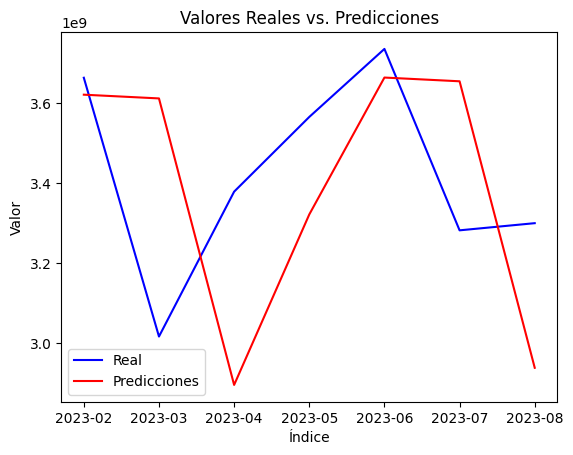

In [74]:
indices = test['mes_año']

plt.plot(indices, test['ventas'], color='blue', label='Real')

plt.plot(indices, predicciones, color='red', label='Predicciones')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones')
plt.legend()

# Mostrar la gráfica
plt.show()

Las graficas de este modelo se ajustan de una manera mas correcta, aunque tiene errores mayores en puntos menores y/o mayores

In [75]:
resultados.forecast(35)

36    3.621546e+09
37    3.612180e+09
38    2.894843e+09
39    3.321658e+09
40    3.664438e+09
41    3.655072e+09
42    2.937735e+09
43    3.364550e+09
44    3.707330e+09
45    3.697964e+09
46    2.980627e+09
47    3.407442e+09
48    3.750222e+09
49    3.740856e+09
50    3.023519e+09
51    3.450334e+09
52    3.793114e+09
53    3.783748e+09
54    3.066411e+09
55    3.493226e+09
56    3.836006e+09
57    3.826640e+09
58    3.109303e+09
59    3.536118e+09
60    3.878898e+09
61    3.869532e+09
62    3.152195e+09
63    3.579010e+09
64    3.921790e+09
65    3.912424e+09
66    3.195087e+09
67    3.621902e+09
68    3.964682e+09
69    3.955316e+09
70    3.237979e+09
dtype: float64

<h2> Entrenando modelo 2 var También con modelos acomulados</h2>

Para este modelo necesitamos otra variable, usaremos la cantidad, por eso armaremos otro dataset

In [76]:
datsetVar=data[['mes_año','calculo_total_lineas','Cantidad']]

In [77]:
ventas_Cantidad = datsetVar.groupby('mes_año')[['calculo_total_lineas', 'Cantidad']].sum()
ventas_Cantidad.head(10)

calculo_total_lineas  Cantidad
mes_año                                
2020-02            3613097397     32601
2020-03            4131160800     28588
2020-04            1738295600     14966
2020-05            3051354025     17088
2020-06            3008474469     23185
2020-07            2564146104     25664
2020-08            2900228584     20685
2020-09            3179421000     24170
2020-10            3308512874     27799
2020-11            3213453775     25512

In [78]:
trainVar, testVar = train_test_split(ventas_Cantidad, test_size=0.15, shuffle=False)

In [79]:
len(trainVar)

36

In [80]:
model = VAR(trainVar)
results = model.fit()

In [81]:
pronostico = results.forecast(results.endog, steps=len(testVar))

pronostico_df = pd.DataFrame(pronostico, columns=ventas_Cantidad.columns)
pronostico_df['calculo_total_lineas']

0    3.178835e+09
1    3.196620e+09
2    3.198127e+09
3    3.198576e+09
4    3.198673e+09
5    3.198695e+09
6    3.198700e+09
Name: calculo_total_lineas, dtype: float64

In [82]:
y_real = testVar['calculo_total_lineas']
y_pred = pronostico_df['calculo_total_lineas']

# Calcular el RMSE y el MAE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)
print(f'RMSE: {rmse:,.2f}'+"$")
print(f'MAE: {mae:,.2f}'+"$")

RMSE: 325,456,164.89$
MAE: 276,484,090.01$


Notamos que tenemos un error de de casi 325 millones, este error seria mensual en las ventas de la compañia

In [83]:
y_real

mes_año
2023-02    3663962600
2023-03    3016006200
2023-04    3378752500
2023-05    3565805500
2023-06    3736117955
2023-07    3281917000
2023-08    3299826490
Name: calculo_total_lineas, dtype: int64

In [84]:
indices = y_real.index

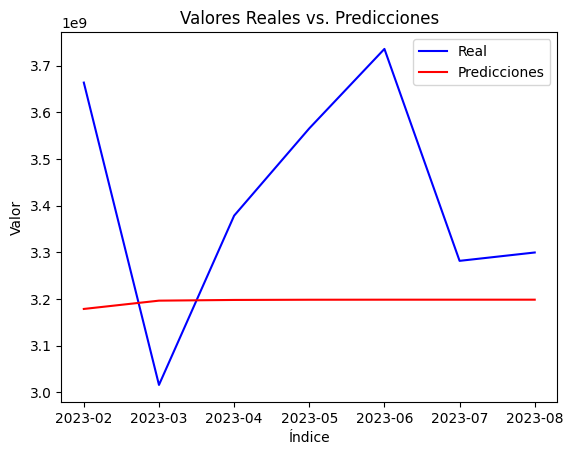

In [85]:
plt.plot(indices, y_real, color='blue', label='Real')

plt.plot(indices, y_pred, color='red', label='Predicciones')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones')
plt.legend()

# Mostrar la gráfica
plt.show()

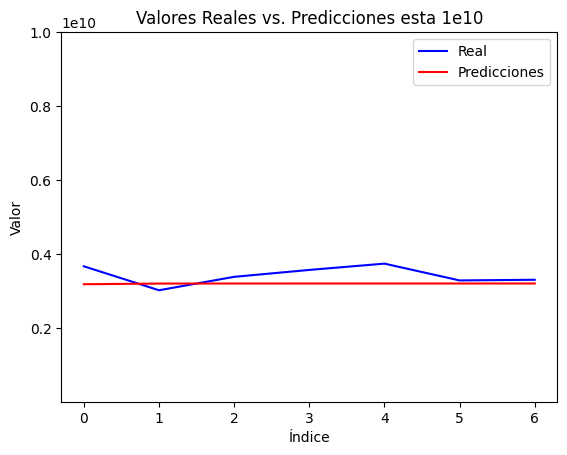

In [86]:
#La misma grafica pero desde una escala mayor
indices = range(len(y_real))
plt.plot(indices, y_real, color='blue', label='Real')
plt.plot(indices, y_pred, color='red', label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones esta 1e10')
plt.legend()

plt.ylim(1, 10000000000) 

plt.show()

In [87]:
pronosticoVario = results.forecast(results.endog, steps=20)

In [88]:
pronosticoVario

array([[3.17883523e+09, 2.35813923e+04],
       [3.19661957e+09, 2.41892468e+04],
       [3.19812694e+09, 2.43283592e+04],
       [3.19857640e+09, 2.43596683e+04],
       [3.19867307e+09, 2.43667376e+04],
       [3.19869509e+09, 2.43683327e+04],
       [3.19870005e+09, 2.43686927e+04],
       [3.19870117e+09, 2.43687740e+04],
       [3.19870142e+09, 2.43687923e+04],
       [3.19870148e+09, 2.43687964e+04],
       [3.19870149e+09, 2.43687974e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04],
       [3.19870150e+09, 2.43687976e+04]])

## Conclusiones

Aunque el segundo modelo tenga una tasa de erro más baja, se  nota que después de ciertos registros el modelo no varía y se queda estático en el dato 3.19870150e+09, esto se debe a que le modelo VAR no tiene grandes datos de entrenamiento, lo que lo vuelve sensible a esto, mientras que el modelo 1 (ExponentialSmoothing); este modelo no fue sensible y mostró variaciones más correctas mes a mes de la información de la variable objetivo total ventas.

De igual manera se deduce que los meses son pocos para el entrenamienot y se nota en las metricas del ejercicio ya que al no tener si no 45 meses disponibles la serie se vuelve sensible a problemas de falta de satos, como underfitting en modelos complejos overfitting.